In [14]:
import core
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
dir = './tests/COD_BO_notCH_3-4/'  # ends with slash
cifs = [i for i in os.listdir(dir) if i.endswith('.cif')]
N = len(cifs)
print(f'{N} files found')

1245 files found


In [16]:
structures = []
for i, c in enumerate(cifs):
    print(f'reading {i+1} file of {N}\r', end='')
    with open(dir+c) as f:
        dict = core.parsecif(f)
        for j in dict['data']:
            str = core.readstruct(j)
            if str is not None:
                structures.append(str)
M = len(structures)
print(f'\n{M} structures read')

reading 1245 file of 1245
1245 structures read


In [ ]:
polyhedra = []
for i, s in enumerate(structures):
    print(f'reading {i+1} structure of {M}\r', end='')
    centr = s.filter('symbol', ['B', 'B3+'])
    ligands = s.filter('symbol', ['O', 'O2-'])
    for j in centr:
        polyhedra.append(s.poly(j, ligands, 2, dmin=0))
P = len(polyhedra)
print(f'\n{P} polyhedra read')

In [19]:
distances = []
for i, p in enumerate(polyhedra):
    print(f'reading {i+1} polyhedron of {P}\r', end='')
    distances += p.listdist()['value']
D = len(distances)
print(f'\n{D} distances evaluated')

reading 2258 polyhedron of 2258
7568 distances evaluated


(array([  1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,
          2.,   2.,   2.,   4.,   1.,   2.,   2.,   4.,   2.,  12.,   8.,
         10.,  11.,   5.,  28.,  20.,  57., 103., 131., 219., 318., 591.,
        716., 759., 484., 377., 283., 151., 156., 244., 357., 436., 508.,
        495., 324., 203., 168.,  90.,  64.,  27.,  35.,  22.,  16.,  22.,
         12.,  19.,   6.,   3.,   2.,   3.,   2.,   2.,   2.,   4.,   6.,
          5.,   1.,   3.,   4.,   2.,   0.,   0.,   2.,   0.,   2.,   3.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   2.,
          0.,   1.]),
 array([1.01932472, 1.02968633, 1.04004794, 1.05040955, 1.06077116,
        1.07113277, 1.08149438, 1.09185599, 1.1022176 , 1.11257921,
        1.12294082, 1.13330243, 1.14366404, 1.15402565, 1.16438726,
        1.17474887, 1.18511048, 1.19547209, 1.2058337 , 1.21619531,
        1.22655692, 1.23691853, 1.24728014, 1.25764175, 1.26800336,
        1.27836497, 1.28872658, 1.29908819, 1.

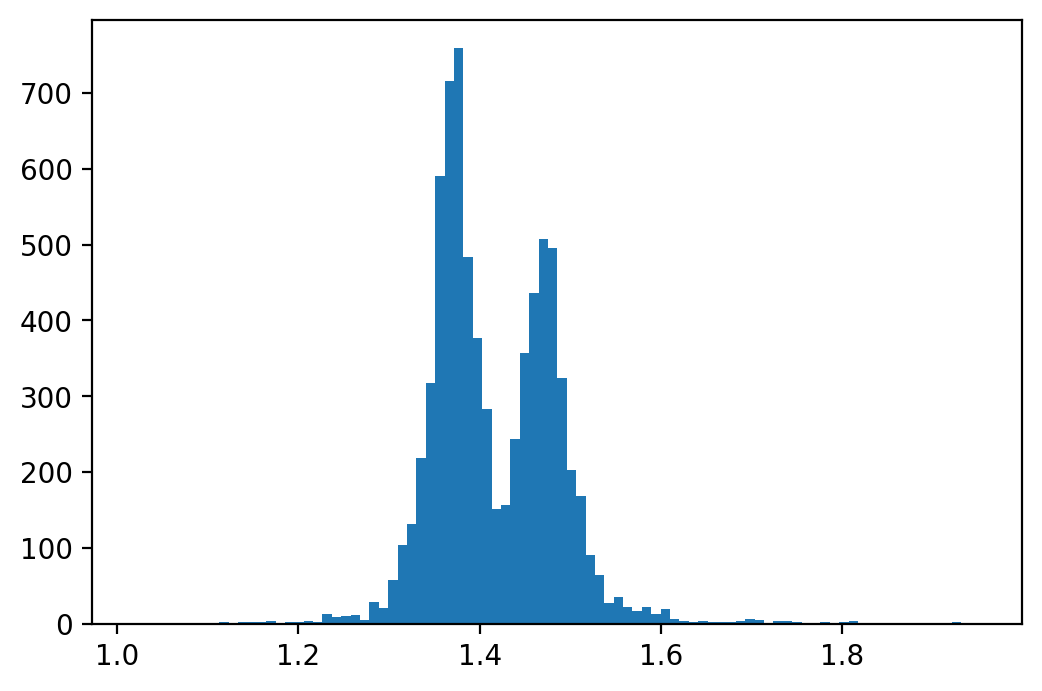

In [20]:
fig, axes = plt.subplots(dpi=200)
axes.hist(np.array(distances), bins='auto')